<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/ECUACIONDEONDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ERICK VALDEZ SALLAGOS**\
APROXIME LA SOLUCION DEL PROBLEMA HIPERBOLICO\
$\frac {∂^2u}{∂x^2}(x,t)-4\frac {∂^2u}{∂x^2}(x,t)=0$; $0<x<1$ ;$0<t$

con condiciones de frontera\
$u(0,t)=u(1,t)=0$ para $0<t$\
y condiciones iniciales
$u(x,0)=sen(πx)$, $\frac {∂u}{∂t}(x,0)=0$\
Usando $h=0.1$ y $k=0.05$. Compare los resultados con la solucion exacta\
$u(x,t)=senπx(cos2πt)$

IMPORTS Y PARAMETROS INICIALES

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

Parametros del problema:

In [57]:

c = 2  # porque c^2 = 4
L = 1.0           # longitud del dominio
h = 0.1           # paso espacial
k = 0.05          # paso temporal
T_final1 = 0.5
T_final2 = 1.0


Definir los parametros (h, k)

In [58]:
lam = c * k / h
print(f"Lambda = {lam}")

# Verificamos condición CFL
if lam > 1:
    print("ADVERTENCIA: El esquema puede ser inestable")


Lambda = 1.0


Discretizacion espacial

In [59]:
x = np.arange(0, L + h, h)
Nx = len(x)

Funcion para resolver la ecuacion de onda (1D)

In [60]:
def solve_wave_equation(T_final):
    Nt = int(T_final / k) + 1
    t = np.linspace(0, T_final, Nt)

    u = np.zeros((Nx, Nt)) # Matriz de solución

    # Condición inicial u(x,0) = sen(πx)
    u[:, 0] = np.sin(np.pi * x)

    # Condición inicial de velocidad cero (usamos aproximación de diferencias centradas)
    # Para j = 0
    for i in range(1, Nx - 1):
        u[i, 1] = u[i, 0] + 0.5 * lam**2 * (u[i+1, 0] - 2*u[i, 0] + u[i-1, 0])

    # Paso temporal:
    for j in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            u[i, j+1] = 2*(1 - lam**2) * u[i, j] + lam**2 * (u[i+1, j] + u[i-1, j]) - u[i, j-1]

    return u, t

Solucion exacta

In [61]:
def exact_solution(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

EJERCICIO 1 (Soluciones y graficas en t=0.5)

In [62]:
u1, t1 = solve_wave_equation(T_final1)

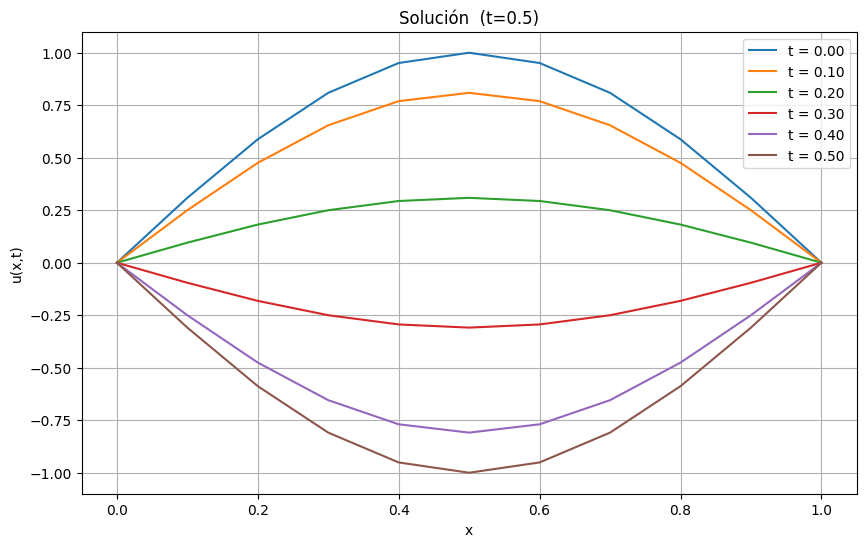

In [63]:
# GRAFICA 2D
plt.figure(figsize=(10, 6))
for j in range(0, len(t1), 2):  # Mostramos cada 2 pasos de tiempo
    plt.plot(x1, u1[:, j], label=f't = {t1[j]:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Solución  (t=0.5)')
plt.legend()
plt.grid(True)
plt.show()


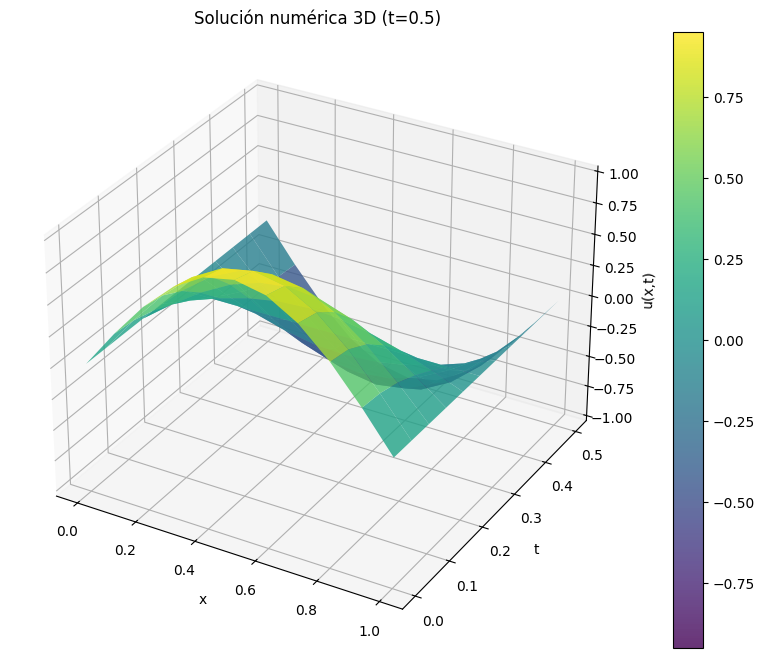

In [64]:
# Gráfica 3D
X, T = np.meshgrid(x1, t1)
U = u1.T  # Transponemos para que coincida con las dimensiones

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, U, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.set_title('Solución numérica 3D (t=0.5)')
plt.colorbar(surf)
plt.show()


EJERCICIO 2 (Comparacion con la Tabla 12.6)

In [65]:
 #    en t=1.0
print("\n=== EJERCICIO 2: Comparación con Tabla 12.6 en t=1.0 ===")

# Tabla 12.6 (valores de referencia)
tabla_12_6 = {
    0.0: 0.0000000000,
    0.1: 0.3090169944,
    0.2: 0.5877852523,
    0.3: 0.8090169944,
    0.4: 0.9510565163,
    0.5: 1.0000000000,
    0.6: 0.9510565163,
    0.7: 0.8090169944,
    0.8: 0.5877852523,
    0.9: 0.3090169944,
    1.0: 0.0000000000
}

# Resolver hasta t=1.0
u2, t2 = solve_wave_equation(T_final2)
u_numerica_t1 = u2[:, -1]  # Solución numérica en t=1.0

print("Comparación con Tabla 12.6 en t=1.0:")
print("x\t\tNumérica\t\tTabla 12.6\t\tError")
errors_tabla = []
for i, xi in enumerate(x):
    if xi in tabla_12_6:
        error = abs(u_numerica_t1[i] - tabla_12_6[xi])
        errors_tabla.append(error)
        print(f"{xi:.1f}\t\t{u_numerica_t1[i]:.10f}\t{tabla_12_6[xi]:.10f}\t{error:.2e}")

print(f"\nError máximo con Tabla 12.6: {max(errors_tabla):.2e}")


=== EJERCICIO 2: Comparación con Tabla 12.6 en t=1.0 ===
Comparación con Tabla 12.6 en t=1.0:
x		Numérica		Tabla 12.6		Error
0.0		0.0000000000	0.0000000000	0.00e+00
0.1		0.3090169944	0.3090169944	2.51e-11
0.2		0.5877852523	0.5877852523	7.53e-12
0.4		0.9510565163	0.9510565163	4.85e-12
0.5		1.0000000000	1.0000000000	0.00e+00
0.8		0.5877852523	0.5877852523	7.53e-12
0.9		0.3090169944	0.3090169944	2.51e-11
1.0		0.0000000000	0.0000000000	0.00e+00

Error máximo con Tabla 12.6: 2.51e-11


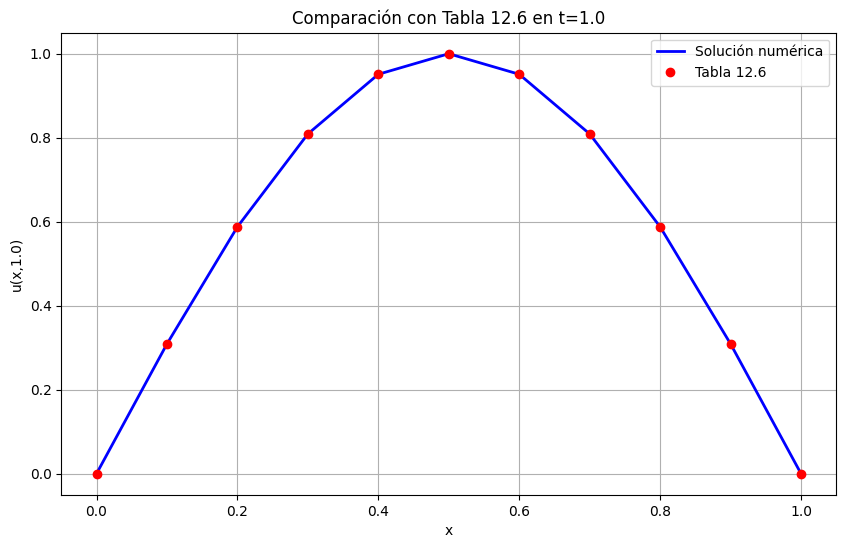

In [66]:

# Gráfica comparación con Tabla 12.6
plt.figure(figsize=(10, 6))
plt.plot(x2, u_numerica_t1, 'b-', label='Solución numérica', linewidth=2)
plt.plot(list(tabla_12_6.keys()), list(tabla_12_6.values()), 'ro',
         label='Tabla 12.6', markersize=6)
plt.xlabel('x')
plt.ylabel('u(x,1.0)')
plt.title('Comparación con Tabla 12.6 en t=1.0')
plt.legend()
plt.grid(True)
plt.show()

EJERCICIO 3: COMPARACION CON LA SOLUCION EXACTA t=0.5

In [67]:
print("\n=== EJERCICIO 3:  ")
u_numerica_t05 = u1[:, -1]  # Solución numérica en t=0.5
u_exacta_t05 = exact_solution(x1, 0.5)  # Solución exacta en t=0.5

print("Comparación con solución exacta en t=0.5:")
print("x\t\tNumérica\t\tExacta\t\t\tError")
errors_exacta = []
for i, xi in enumerate(x1):
    error = abs(u_numerica_t05[i] - u_exacta_t05[i])
    errors_exacta.append(error)
    print(f"{xi:.1f}\t\t{u_numerica_t05[i]:.10f}\t{u_exacta_t05[i]:.10f}\t{error:.2e}")

print(f"\nError máximo con solución exacta: {max(errors_exacta):.2e}")


=== EJERCICIO 3:  
Comparación con solución exacta en t=0.5:
x		Numérica		Exacta			Error
0.0		0.0000000000	-0.0000000000	0.00e+00
0.1		-0.3090169944	-0.3090169944	5.55e-17
0.2		-0.5877852523	-0.5877852523	0.00e+00
0.3		-0.8090169944	-0.8090169944	0.00e+00
0.4		-0.9510565163	-0.9510565163	0.00e+00
0.5		-1.0000000000	-1.0000000000	0.00e+00
0.6		-0.9510565163	-0.9510565163	1.11e-16
0.7		-0.8090169944	-0.8090169944	0.00e+00
0.8		-0.5877852523	-0.5877852523	1.11e-16
0.9		-0.3090169944	-0.3090169944	5.55e-17
1.0		0.0000000000	-0.0000000000	1.22e-16

Error máximo con solución exacta: 1.22e-16


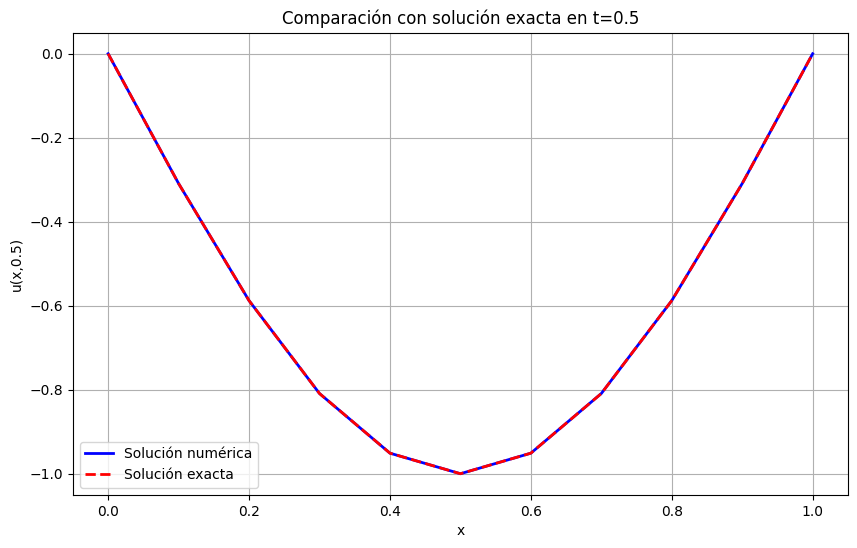

In [68]:
# Gráfica comparación con solución exacta
plt.figure(figsize=(10, 6))
plt.plot(x1, u_numerica_t05, 'b-', label='Solución numérica', linewidth=2)
plt.plot(x1, u_exacta_t05, 'r--', label='Solución exacta', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x,0.5)')
plt.title('Comparación con solución exacta en t=0.5')
plt.legend()
plt.grid(True)
plt.show()

EJERCICIO 4: ANIMACION


=== EJERCICIO 4: Animación de la evolución temporal ===


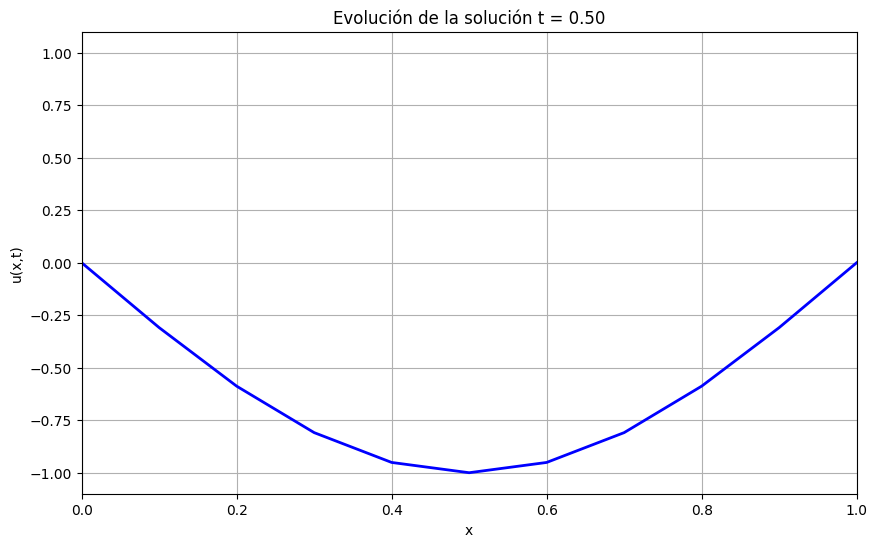

In [72]:

print("\n=== EJERCICIO 4: Animación de la evolución temporal ===")
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x1, u1[:, 0], 'b-', linewidth=2)
ax.set_xlim(0, 1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución de la solución de la ecuación de onda')
ax.grid(True)

def animate(frame):
    line.set_ydata(u1[:, frame])
    ax.set_title(f'Evolución de la solución t = {t1[frame]:.2f}')
    return line,

# Crear animación
anim = FuncAnimation(fig, animate, frames=len(t1), interval=50, blit=True)

# Para mostrar la animación en Colab
from IPython.display import HTML
HTML(anim.to_jshtml())




